# Project: Wrangling and Analyzing Data


## WeRateDogs Twetter Archive


#### By Elliot M Sithole

**06/09/2022**

## Data Gathering
In this project, all three pieces of data was sourced from three different means  and uploaded into the pandas data frame:
1. Twitter archive file:  manual direct download of file [link](https://d17h27t6h515a5.cloudfront.net/topher/2017/August/59a4e958_twitter-archive-enhanced/twitter-archive-enhanced.csv).
2. The tweet image predictionns: the dog breed prediction present in each tweet according to a neural network. This file (image_predictions.tsv) is hosted on Udacity's servers and  downloaded programmatically using the Requests library and the following [URL](https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv).
3. Twitter API & JSON: To gather each tweet's retweet count and favorite ("like") count at minimum, and any additional interesting data. Utilizing the tweet IDs in the WeRateDogs Twitter archive,to query the Twitter API for each tweet's JSON data using Python's *Tweepy library* and  to store each tweet's entire set of JSON data in a file (*tweet_json.txt file*). Each tweet's JSON data written its own line and then read as .txt file line by line into a pandas DataFrame with (at minimum) tweet ID, retweet count, and favorite count.

**1. Twitter archive file**

In [1964]:
#Import  relevant packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import requests
import tweepy 
import json 

In [1965]:
df_twitter_archive= pd.read_csv('twitter-archive-enhanced.csv')
df_twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [1966]:
#programatically download the twitter image prediction data
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = requests.get(url)

with open('image-predictions.tsv', mode ='wb') as file:
    file.write(response.content)


image_prd = pd.read_csv('image-predictions.tsv', sep='\t' )

In [1967]:
image_prd.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [1968]:
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
#consumer_key = 'HIDDEN'
#consumer_secret = 'HIDDEN'
#access_token = 'HIDDEN'
#access_secret = 'HIDDEN'

#auth = OAuthHandler(consumer_key, consumer_secret)
#auth.set_access_token(access_token, access_secret)

#api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
#tweet_ids = df_twitter_archive.tweet_id.values
#len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
#count = 0
#fails_dict = {}
#start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
#with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    #for tweet_id in tweet_ids:
        #count += 1
        #print(str(count) + ": " + str(tweet_id))
        #try:
            #tweet = api.get_status(tweet_id, tweet_mode='extended')
            #print("Success")
            #json.dump(tweet._json, outfile)
            #outfile.write('\n')
        #except tweepy.TweepError as e:
            #print("Fail")
            #fails_dict[tweet_id] = e
            #pass
#end = timer()
#print(end - start)
#print(fails_dict)

In [1969]:
df_list = []
with open('tweet_json.txt', 'r') as file:
    for line in file:
        data = json.loads(line)
        df_list.append(data)
df_tweet = pd.DataFrame(df_list, columns=['id', 'retweet_count', 'favorite_count'])

In [1970]:
df_tweet.head()

,id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


## Assessing Data
In this section, I will detect and document at least **eight (8) quality issues and two (2) tidiness issue**. And must use **both** visual assessment programmatic assessements to assess the data.




1. **Visual Preview.**

In [1971]:
df_twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [1972]:
df_twitter_archive.doggo.value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In [1973]:
df_twitter_archive.floofer.value_counts()

None       2346
floofer      10
Name: floofer, dtype: int64

In [1974]:
df_twitter_archive.pupper.value_counts()

None      2099
pupper     257
Name: pupper, dtype: int64

In [1975]:
df_twitter_archive.puppo.value_counts()

None     2326
puppo      30
Name: puppo, dtype: int64

In [1976]:
df_twitter_archive.text.sample(5)

348     This is Daisy. She has a heart on her butt. 13...
412     This is Albus. He's soaked as h*ck. Seems to h...
166     Meet Milky. She has no idea what happened. Jus...
1621    Meet Bruiser &amp; Charlie. They are the best ...
388     This is Pawnd... James Pawnd. He's suave af. 1...
Name: text, dtype: object

In [1977]:
df_tweet.sample(3)

,id,retweet_count,favorite_count
2282,667192066997374976,115,414
1351,703769065844768768,1276,3621
719,783347506784731136,6533,0


In [1978]:
image_prd.sample(3)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
486,675497103322386432,https://pbs.twimg.com/media/CV_ZAhcUkAUeKtZ.jpg,1,vizsla,0.519589,True,miniature_pinscher,0.064771,True,Rhodesian_ridgeback,0.061491,True
321,671855973984772097,https://pbs.twimg.com/media/CVLpciDW4AAleh-.jpg,1,chimpanzee,0.636031,False,gorilla,0.098752,False,fountain,0.031755,False
533,676897532954456065,https://pbs.twimg.com/media/CWTSt0UW4AALMNB.jpg,1,hamster,0.628255,False,guinea_pig,0.318646,False,macaque,0.013058,False


2. **Programmatic Check**

**Assess the Twitter archive dataframe.**

In [1979]:
df_twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [1980]:
df_twitter_archive.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [1981]:
df_twitter_archive.name.value_counts().head()

None       745
a           55
Charlie     12
Oliver      11
Lucy        11
Name: name, dtype: int64

In [1982]:
df_twitter_archive.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [1983]:
df_twitter_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


**Assess the image predictions dataset**

In [1984]:
image_prd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [1985]:
image_prd.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [1986]:
image_prd.isnull().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

**Assess the tweet_json dataframe**

In [1987]:
df_tweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   id              2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


In [1988]:
df_tweet.head()

,id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


In [1989]:
df_tweet.isnull().sum()

id                0
retweet_count     0
favorite_count    0
dtype: int64

### Quality issues

1. Wrong datatype in the *TimeStamp* column data in the twitter_archive dataframe  that requires change.

2. Wrong datatype in the *tweet_id* columns data from all dataframes.

3. Unnecessary columns with very low imputed data; retweeted_status_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_timestamp and retweeted_status_user_id.

4. In the twitter_archive dataframe, there are values in the rating_denominator not equal to 10.

5. In the twitter_archive dataframe, there are values in the rating_numerator column with errors and are unrealistic.

6. In the twitter_archive dataframe, some dog names are missing, unidentified or weird.

7. In the images dataframe image predictions that are not dogs.

8. In the archive dataframe, unrated dogs.



### Tidiness issues

1. Inconsistent uppercase and lower case letters on dog types in columns p1, p2 and p3 for image_prd dataframe.

2. Inconsistent naming of id column from both df_tweet and twitter_archive dataframes.

3. The dog stage(doggo,	floofer, pupper, puppo ) columns in archive dataframe  can be condensed into a single column.

3. Combine all 3 dataframes into one.

## Cleaning Data
In this section, is to focus on cleaning **all** of the issues documented while assessing the data sets. 



In [1990]:
# Make copies of original pieces of data
archive= df_twitter_archive.copy()
tweet = df_tweet.copy()
images = image_prd.copy()

### Issue #1: Wrong datatype in the *timestamp* column data in the twitter_archive dataframe  that requires change.

#### Define: Change timestamp data type from int64 to_datetime()

#### Code

In [1991]:
archive.timestamp= pd.to_datetime(archive.timestamp)

#### Test

In [1992]:
print(archive.timestamp.dtype)

datetime64[ns, UTC]


### Issue #2: Wrong datatype in the tweet_id column data in all dataframes.

#### Define: Change *tweet_id* datatype from int64 to string using astype() pandas function.

#### Code

In [1993]:
archive.tweet_id = archive.tweet_id.astype('str')
tweet.id = tweet.id.astype('str')
images.tweet_id = images.tweet_id.astype('str')

#### Test

In [1994]:
print( archive.tweet_id.dtype)
print( tweet.id.dtype)
print( images.tweet_id.dtype)

object
object
object


### Issue #3: Unnecessary columns with very low imputed data as contributors.

#### Define: Drop columns in the archive with unnecessary features.

#### Code

In [1995]:
# Clean the archive dataframe
archive.drop(['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp', 'in_reply_to_status_id', 'in_reply_to_user_id', 'expanded_urls'], axis=1, inplace=True)

#### Test

In [1996]:
for col in archive.columns:
    print(col)

tweet_id
timestamp
source
text
rating_numerator
rating_denominator
name
doggo
floofer
pupper
puppo


### Issue #4: In the twitter_archive dataframe, there are values in the rating_denominator that are not equal to 10.

#### Define: Check and assign so that  all rating denominator should be equal to 10.

#### Code

In [1997]:
# check count of values not equal to 10
print(archive.query('rating_denominator != 10').count())

tweet_id              23
timestamp             23
source                23
text                  23
rating_numerator      23
rating_denominator    23
name                  23
doggo                 23
floofer               23
pupper                23
puppo                 23
dtype: int64


In [1998]:
# assign denominotor 10
archive = archive.assign(rating_denominator= 10)

#### Test

In [1999]:
print(archive.query('rating_denominator != 10').count())

tweet_id              0
timestamp             0
source                0
text                  0
rating_numerator      0
rating_denominator    0
name                  0
doggo                 0
floofer               0
pupper                0
puppo                 0
dtype: int64


In [2000]:
print(archive.query('rating_denominator == 10').count())

tweet_id              2356
timestamp             2356
source                2356
text                  2356
rating_numerator      2356
rating_denominator    2356
name                  2356
doggo                 2356
floofer               2356
pupper                2356
puppo                 2356
dtype: int64


### Issue #5: In the twitter_archive dataframe, there are values in the rating_numerator column with error and are unrealistic.

#### Define: Inspect for errors on extraction from *text* column
##### Check visually and correct all errors for values less than 10 and greater than 15  for the rating numerator.

#### Code

In [2001]:
error_numerator=archive.query('rating_numerator < 10 or rating_numerator > 15')[['text','rating_numerator', 'rating_denominator']]
# visually inspect for errors on excel
error_numerator.to_csv('visual_check.csv')
error_numerator

,text,rating_numerator,rating_denominator
45,This is Bella. She hopes her smile made you sm...,5,10
55,@roushfenway These are good dogs but 17/10 is ...,17,10
188,@dhmontgomery We also gave snoop dogg a 420/10...,420,10
189,@s8n You tried very hard to portray this good ...,666,10
229,This is Jerry. He's doing a distinguished tong...,6,10
...,...,...,...
2351,Here we have a 1949 1st generation vulpix. Enj...,5,10
2352,This is a purebred Piers Morgan. Loves to Netf...,6,10
2353,Here is a very happy pup. Big fan of well-main...,9,10
2354,This is a western brown Mitsubishi terrier. Up...,7,10


In [2002]:
archive.head()

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,13,10,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,12,10,Franklin,None,None,None,None


**Use the *iloc* function to locate the indexes with issues and fix**

In [2003]:
# fix discovered errors on numerator ratings 
#313 rating error 960/00 instead of 13
archive.iloc[313, 4] = 13

# 342 no rating; rating error date 11/15/15 imputed
archive.iloc[342, 4] = 0


#516 no rating; rating mistaken for expression 24/7 smile
archive.iloc[516, 4] = 0


#784 rating error  9/11 instead of 14
archive.iloc[784, 4] = 14


#rating error 9/11 instead of 14
archive.iloc[1068, 4] = 14


#1165 rating error 4/20 instead of 13
archive.iloc[1165, 4] = 13


#1202 rating error 50/50 instead of 11
archive.iloc[1202, 4] = 11


#1662 rating error 7/11 instead of 10
archive.iloc[1662, 4] = 10


#2335 rating error 1/2 instead of 9
archive.iloc[2335, 4] = 9


#rating errors on values after the decimal points
archive.iloc[45, 4] = 14
archive.iloc[695, 4] = 10
archive.iloc[763, 4] = 11
archive.iloc[1689, 4] = 10
archive.iloc[1712, 4] = 11

In [2004]:
#Fix errors due to inconsitent ratings numerator over denominator 

#433 rating convert 84/70
archive.iloc[433, 4] = 12

#902 rating convert 165/150
archive.iloc[902, 4] = 11

#1120 rating convert 204/170
archive.iloc[1120, 4] = 12

#1228 rating convert 99/90
archive.iloc[1228, 4] = 11

#1254 rating convert 80/80
archive.iloc[1254, 4] = 10

#1274 rating convert 45/50
archive.iloc[1274, 4] = 9

#1351 rating convert 60/50
archive.iloc[1351, 4] = 12

#1433 rating convert 44/40
archive.iloc[1351, 4] = 11

#1634 rating convert 143/130
archive.iloc[1634, 4] = 11

#1635 rating convert 121/110
archive.iloc[1635, 4] = 11

#1663 rating convert 20/16
archive.iloc[1663, 4] = 13

#1779 rating convert 144/120
archive.iloc[1779, 4] = 12

#1843 rating convert 88/80
archive.iloc[1843, 4] = 11


#### Test

In [2005]:
#confirm changes
archive.iloc[[313, 342, 516, 784, 1068, 1165, 1202, 1662, 2335, 1779,1843], [3,4,5]]

,text,rating_numerator,rating_denominator
313,@jonnysun @Lin_Manuel ok jomny I know you're e...,13,10
342,@docmisterio account started on 11/15/15,0,10
516,Meet Sam. She smiles 24/7 &amp; secretly aspir...,0,10
784,"RT @dog_rates: After so many requests, this is...",14,10
1068,"After so many requests, this is Bretagne. She ...",14,10
1165,Happy 4/20 from the squad! 13/10 for all https...,13,10
1202,This is Bluebert. He just saw that both #Final...,11,10
1662,This is Darrel. He just robbed a 7/11 and is i...,10,10
2335,This is an Albanian 3 1/2 legged Episcopalian...,9,10
1779,IT'S PUPPERGEDDON. Total of 144/120 ...I think...,12,10


In [2006]:
archive.sample(5)
    

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1948,673697980713705472,2015-12-07 02:58:09+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Pickles. She's a tiny pointy pupper. A...,8,10,Pickles,None,None,pupper,None
418,822462944365645825,2017-01-20 15:17:01+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Gabe. He was the unequivocal embodimen...,14,10,Gabe,None,None,pupper,None
460,817777686764523521,2017-01-07 16:59:28+00:00,"<a href=""http://twitter.com/download/iphone"" r...","This is Dido. She's playing the lead role in ""...",13,10,Dido,doggo,None,pupper,None
504,813051746834595840,2016-12-25 16:00:16+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Bauer. He had nothing to do with the c...,13,10,Bauer,None,None,None,None
1412,698953797952008193,2016-02-14 19:35:46+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Meet CeCe. She wanted to take a selfie before ...,11,10,CeCe,None,None,None,None


### Issue #6: In the twitter_archive dataframe, some dog names are missing, unidentified or weird.

#### Define: replace missing, unidentified or weird names with *none*.

#### Code

In [2007]:
#check names
archive.name.value_counts()

None       745
a           55
Charlie     12
Oliver      11
Lucy        11
          ... 
Stella       1
Lacy         1
Tommy        1
Gin          1
Todo         1
Name: name, Length: 957, dtype: int64

In [2008]:
# After visual inspection weird names are categorized.
weird_names = (["a", "all", "an", "by", "his", "just", "my", "not", "such", "the", "this", "very"])
for n in weird_names:
    archive.name.replace(n, 'None', inplace=True)


#### Test

In [2009]:
print(archive.name.value_counts())

None       832
Charlie     12
Oliver      11
Lucy        11
Cooper      11
          ... 
Tommy        1
Gin          1
Mark         1
Lucky        1
Oddie        1
Name: name, Length: 945, dtype: int64


In [2010]:
archive.head(10)

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,13,10,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,12,10,Franklin,None,None,None,None
5,891087950875897856,2017-07-29 00:08:17+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,13,10,None,None,None,None,None
6,890971913173991426,2017-07-28 16:27:12+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,13,10,Jax,None,None,None,None
7,890729181411237888,2017-07-28 00:22:40+00:00,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,13,10,None,None,None,None,None
8,890609185150312448,2017-07-27 16:25:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,13,10,Zoey,None,None,None,None
9,890240255349198849,2017-07-26 15:59:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,14,10,Cassie,doggo,None,None,None


### Issue #7: In the image dataframe, some predictions are likely not dogs

#### Define: Drop image predictions that are not dogs

#### Code

In [2011]:
images.head(20)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [2012]:
images.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   object 
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


In [2013]:
images.p1_dog.value_counts()

True     1532
False     543
Name: p1_dog, dtype: int64

In [2014]:
images.p2_dog.value_counts()

True     1553
False     522
Name: p2_dog, dtype: int64

In [2015]:
images.p3_dog.value_counts()

True     1499
False     576
Name: p3_dog, dtype: int64

In [2016]:
# Drop all rows with all False for p1_dog, p2_dog and p3_dog
# Use the query function that meets; condition that accepts any dog prediction that is True
images= images.query('p1_dog ==True or p2_dog == True or p3_dog==True')

#### Test

In [2017]:
images.head(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True
10,666063827256086533,https://pbs.twimg.com/media/CT5Vg_wXIAAXfnj.jpg,1,golden_retriever,0.775930,True,Tibetan_mastiff,0.093718,True,Labrador_retriever,0.072427,True


In [2018]:
images.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1751 entries, 0 to 2073
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  1751 non-null   object 
 1   jpg_url   1751 non-null   object 
 2   img_num   1751 non-null   int64  
 3   p1        1751 non-null   object 
 4   p1_conf   1751 non-null   float64
 5   p1_dog    1751 non-null   bool   
 6   p2        1751 non-null   object 
 7   p2_conf   1751 non-null   float64
 8   p2_dog    1751 non-null   bool   
 9   p3        1751 non-null   object 
 10  p3_conf   1751 non-null   float64
 11  p3_dog    1751 non-null   bool   
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 141.9+ KB


### Issue #8: In the archive dataframe, unrated dogs.

#### Define: Drop unrated rows for rating numerator and denominator; those with zeros

**NOTE**: **We are only interested in rated dogs**



#### Code

In [2019]:
# use the query function to select non-zero in ratings
archive= archive.query('rating_numerator != 0 & rating_denominator !=0')

 

#### Test

In [2020]:
archive.query('rating_numerator == 0 & rating_denominator ==0').count()

tweet_id              0
timestamp             0
source                0
text                  0
rating_numerator      0
rating_denominator    0
name                  0
doggo                 0
floofer               0
pupper                0
puppo                 0
dtype: int64

In [2021]:
archive.query('rating_numerator != 0 & rating_denominator !=0').count()

tweet_id              2352
timestamp             2352
source                2352
text                  2352
rating_numerator      2352
rating_denominator    2352
name                  2352
doggo                 2352
floofer               2352
pupper                2352
puppo                 2352
dtype: int64

### Tidiness issues

### Issue #1: Inconsistent uppercase and lower case letters on dog types in columns p1, p2 and p3 for images dataframe.

#### Define: Make dog type names p1,p2 and p3 consistent using the *str.title()* method.

#### Code

In [2022]:
images.p1 = images.p1.str.title()
images.p2 = images.p2.str.title()
images.p3 = images.p3.str.title()

#### Test

In [2023]:
images.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_Springer_Spaniel,0.465074,True,Collie,0.156665,True,Shetland_Sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,Redbone,0.506826,True,Miniature_Pinscher,0.074192,True,Rhodesian_Ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_Shepherd,0.596461,True,Malinois,0.138584,True,Bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_Ridgeback,0.408143,True,Redbone,0.360687,True,Miniature_Pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,Miniature_Pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


### Issue #2: Inconsistent naming of id column from both tweet and archive dataframes.

#### Define: Use *rename* function to change *id* column name  in tweet to *tweet_id*

In [2024]:
tweet.rename(columns = {'id':'tweet_id'}, inplace = True)

#### Test

In [2025]:
tweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        2354 non-null   object
 1   retweet_count   2354 non-null   int64 
 2   favorite_count  2354 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 55.3+ KB


### Issue #3: The dog stage (doggo,	floofer, pupper, puppo ) columns in archive dataframe  can be condensed into a single column.

#### Define: Create a single column dog_stage from doggo, floofer, pupper,and  puppo columns

#### Code

In [2026]:
# define dog stage criteria from provided inputs, return *none* if not provided
def get_stage(row):
    if 'doggo' in row['text'].lower():
        dog_stage = 'doggo'
    elif 'floof' in row['text'].lower():
        dog_stage = 'floofer'
    elif 'pupper' in row['text'].lower():
        dog_stage = 'pupper'
    elif 'puppo' in row['text'].lower():
        dog_stage = 'puppo'
    else:
        dog_stage = 'None'
    return dog_stage

# make dog_stage a category using astype()

archive['dog_stage'] = archive.apply(get_stage, axis=1)
archive['dog_stage'] = archive.dog_stage.astype('category')

In [2027]:
archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2352 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2352 non-null   object             
 1   timestamp           2352 non-null   datetime64[ns, UTC]
 2   source              2352 non-null   object             
 3   text                2352 non-null   object             
 4   rating_numerator    2352 non-null   int64              
 5   rating_denominator  2352 non-null   int64              
 6   name                2352 non-null   object             
 7   doggo               2352 non-null   object             
 8   floofer             2352 non-null   object             
 9   pupper              2352 non-null   object             
 10  puppo               2352 non-null   object             
 11  dog_stage           2352 non-null   category           
dtypes: category(1), datetime64[ns, UTC

In [2028]:
# drop columns; doggo, floofer, pupper,and puppo 
archive.drop(['doggo','pupper','floofer','puppo'], axis=1, inplace=True)

#### Test

In [2029]:
archive.dog_stage.value_counts()

None       1901
pupper      270
doggo       107
floofer      38
puppo        36
Name: dog_stage, dtype: int64

In [2030]:
archive.head(10)

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,dog_stage
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,None
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,13,10,Tilly,None
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,None
3,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,13,10,Darla,None
4,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,12,10,Franklin,None
5,891087950875897856,2017-07-29 00:08:17+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,13,10,None,None
6,890971913173991426,2017-07-28 16:27:12+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,13,10,Jax,None
7,890729181411237888,2017-07-28 00:22:40+00:00,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,13,10,None,None
8,890609185150312448,2017-07-27 16:25:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,13,10,Zoey,None
9,890240255349198849,2017-07-26 15:59:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,14,10,Cassie,doggo


### Issue#4: Combine all 3 dataframes into one.

#### Define: Merge all  3 dataframes for  the dog data into a single dataframe on *tweet_id*.

#### Code

In [2031]:
# merge on tweet_id
twitter_clean = pd.merge(archive, images, on='tweet_id', how= 'left')
twitter_clean  = twitter_clean.merge(tweet, on='tweet_id', how= 'left')

#### Test

In [2032]:
twitter_clean.sample(10)

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,dog_stage,jpg_url,img_num,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
172,858843525470990336,2017-05-01 00:40:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",I have stumbled puppon a doggo painting party....,13,10,None,doggo,https://pbs.twimg.com/media/C-s5oYZXkAAMHHq.jpg,1.0,...,0.578120,True,Labrador_Retriever,0.286059,True,Bloodhound,0.026917,True,3771.0,16304.0
2095,670717338665226240,2015-11-28 21:34:09+00:00,"<a href=""http://twitter.com/download/iphone"" r...",*screams for a little bit and then crumples to...,12,10,None,None,https://pbs.twimg.com/media/CU7d2vKUcAAFZyI.jpg,1.0,...,0.368161,True,Pekinese,0.350973,True,Golden_Retriever,0.114902,True,547.0,1301.0
694,786595970293370880,2016-10-13 15:54:28+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Dale. He's a real spookster. Did me qu...,11,10,Dale,None,https://pbs.twimg.com/media/CuqM0fVWAAAboKR.jpg,1.0,...,0.709512,True,Cardigan,0.287178,True,Chow,0.000570,True,3601.0,10497.0
1496,692158366030913536,2016-01-27 01:33:08+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Edgar. He's a Sassafras Puggleflash. N...,10,10,Edgar,None,https://pbs.twimg.com/media/CZsKVxfWQAAXy2u.jpg,1.0,...,0.956565,True,Swing,0.018907,False,Toy_Poodle,0.013544,True,896.0,2369.0
1162,722613351520608256,2016-04-20 02:30:23+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Meet Schnitzel. He's a Tropicana Floofboop. Ge...,12,10,Schnitzel,floofer,https://pbs.twimg.com/media/Cgc9AjMVIAERdUA.jpg,1.0,...,0.530915,True,Golden_Retriever,0.288230,True,Chow,0.044854,True,1831.0,5393.0
712,783839966405230592,2016-10-06 01:23:05+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Riley. His owner put a donut pillow ar...,13,10,Riley,None,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12643.0,33689.0
1491,692535307825213440,2016-01-28 02:30:58+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Amber. She's a Fetty Woof. 10/10 would...,10,10,Amber,None,https://pbs.twimg.com/media/CZxhL2yWAAI_DHn.jpg,1.0,...,0.413090,True,French_Bulldog,0.199865,True,Chihuahua,0.081991,True,1529.0,3504.0
1325,705898680587526145,2016-03-04 23:32:15+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Meet Max. He's a Fallopian Cephalopuff. Eyes a...,10,10,Max,None,https://pbs.twimg.com/media/CcvbGj5W8AARjB6.jpg,1.0,...,0.808276,True,Border_Collie,0.059437,True,Groenendael,0.026720,True,643.0,2597.0
1239,711968124745228288,2016-03-21 17:30:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Meet Winston. He's trapped in a cup of coffee....,10,10,Winston,pupper,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2601.0,8776.0
1964,673320132811366400,2015-12-06 01:56:44+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Frankie. He's wearing blush. 11/10 rea...,11,10,Frankie,None,https://pbs.twimg.com/media/CVgdFjNWEAAxmbq.jpg,3.0,...,0.978833,True,Pomeranian,0.012763,True,Eskimo_Dog,0.001853,True,8705.0,14441.0


In [2033]:
list(twitter_clean)

['tweet_id',
 'timestamp',
 'source',
 'text',
 'rating_numerator',
 'rating_denominator',
 'name',
 'dog_stage',
 'jpg_url',
 'img_num',
 'p1',
 'p1_conf',
 'p1_dog',
 'p2',
 'p2_conf',
 'p2_dog',
 'p3',
 'p3_conf',
 'p3_dog',
 'retweet_count',
 'favorite_count']

In [2034]:
twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2352 entries, 0 to 2351
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2352 non-null   object             
 1   timestamp           2352 non-null   datetime64[ns, UTC]
 2   source              2352 non-null   object             
 3   text                2352 non-null   object             
 4   rating_numerator    2352 non-null   int64              
 5   rating_denominator  2352 non-null   int64              
 6   name                2352 non-null   object             
 7   dog_stage           2352 non-null   category           
 8   jpg_url             1749 non-null   object             
 9   img_num             1749 non-null   float64            
 10  p1                  1749 non-null   object             
 11  p1_conf             1749 non-null   float64            
 12  p1_dog              1749 non-null 

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [2035]:
twitter_clean.to_csv('twitter_archive_master.csv',index=False)

## Analyzing and Visualizing Data
 

In [2036]:
df = pd.read_csv('twitter_archive_master.csv')
df.head()

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,dog_stage,jpg_url,img_num,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,None,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8853.0,39467.0
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,13,10,Tilly,None,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.0,...,0.323581,True,Pekinese,0.090647,True,Papillon,0.068957,True,6514.0,33819.0
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,None,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1.0,...,0.716012,True,Malamute,0.078253,True,Kelpie,0.031379,True,4328.0,25461.0
3,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,13,10,Darla,None,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1.0,...,0.170278,False,Labrador_Retriever,0.168086,True,Spatula,0.040836,False,8964.0,42908.0
4,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,12,10,Franklin,None,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2.0,...,0.555712,True,English_Springer,0.225770,True,German_Short-Haired_Pointer,0.175219,True,9774.0,41048.0


**Get the top 5 popular dog names**

In [2037]:
#use the groupby(), then apply sort_values with ascending=False
popular= df.query('name == name').groupby(['name']).count()[['tweet_id']]
popular_names=popular.apply(lambda x: x.sort_values(ascending=False))
popular_names.head(6)                           

,tweet_id
name,
None,829
Charlie,12
Oliver,11
Cooper,11
Lucy,11
Lola,10


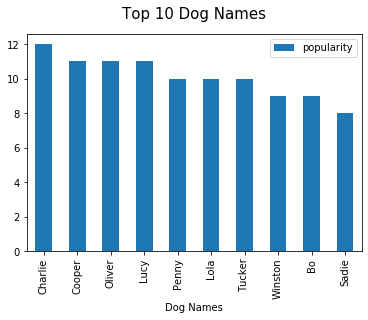

In [2038]:
#plot top 10 dog names bar chat, exclude *None*.
df.name.value_counts()[1:11].plot(kind='bar')
plt.title("Top 10 Dog Names",{'fontsize': 15},pad=15)
plt.xlabel("Dog Names")
plt.legend(["popularity"]);

**Get the top two highly rated dog breead**

In [2039]:
# Fisrt create breed column that selects breed name based on defined confidence criteria

def get_breed(row):
    breed_conf = 0
    breed_name = ''
    is_breed = False
    if(row.p1_dog == True):
        if(row.p1_conf >= breed_conf):
            breed_conf = row.p1_conf
            breed_name = row.p1
            is_breed = True
    if(row.p2_dog == True):
        if(row.p2_conf >= breed_conf):
            breed_conf = row.p2_conf
            breed_name = row.p2
            is_breed = True
    if(row.p3_dog == True):
        if(row.p2_conf >= breed_conf):
            breed_conf = row.p3_conf
            breed_name = row.p3
            is_breed = True
    if is_breed == False:
        return np.nan
    else:
        return breed_name
        
        
    
df['breed'] = df.apply(get_breed,axis=1)

In [2040]:
# drop unneccesary columns for tidiness
df.drop(columns=['p1','p2','p3','p1_dog','p2_dog','p3_dog','p1_conf', 'p2_conf', 'p3_conf'],inplace=True)

In [2041]:
# create column for overall rating from rating_numerator and rating_denominator
df['rating'] = (df.rating_numerator / df.rating_denominator).astype(float) 
# drop rating_numerator and rating_denominator columns for tideness
df.drop(columns=['rating_numerator','rating_denominator'],inplace=True)

In [2042]:
df.sample(1)

,tweet_id,timestamp,source,text,name,dog_stage,jpg_url,img_num,retweet_count,favorite_count,breed,rating
553,803638050916102144,2016-11-29 16:33:36+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Pupper hath acquire enemy. 13/10 https://t.co/...,None,pupper,https://pbs.twimg.com/ext_tw_video_thumb/80363...,1.0,4828.0,12270.0,Labrador_Retriever,1.3


In [2043]:
#use the query() to select only dogs with breed type
#use the groupby(), then apply sort_values with ascending=False

rated_breed=df.query('breed == breed').groupby(['rating', 'breed']).count()[['tweet_id']]
popular_rated_breed=rated_breed.apply(lambda x: x.sort_values(ascending=False))
popular_rated_breed.head(5)  

tweet_id
rating breed                       
1.2    Golden_Retriever          62
       Labrador_Retriever        36
1.1    Golden_Retriever          35
1.3    Golden_Retriever          32
1.2    Pembroke                  30

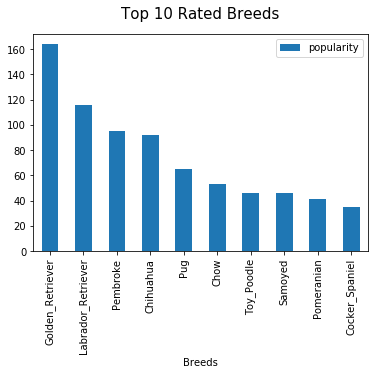

In [2044]:
#plot bar  chat with top ten rated dog breeds.
df.breed.value_counts()[0:10].plot(kind='bar')
plt.title("Top 10 Rated Breeds",{'fontsize': 15},pad=15)
plt.xlabel("Breeds")
plt.legend(["popularity"]);


#### Get the dog breeds with most average retweet and favorite counts.

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


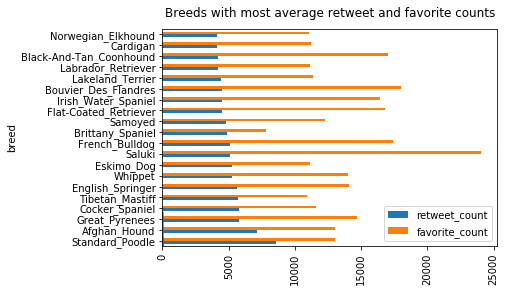

In [2057]:
#use the groupby() for breeds and store the means of retweet_count and favorite_count.
df_breeds = df.groupby(['breed'])['retweet_count', 'favorite_count'].mean()
# use the sort_values () to order by retweet_count and favorite_count.
df_breeds = df_breeds.sort_values(['retweet_count', 'favorite_count'], ascending=False)
#plot the top 20 average counts.
df_top_breeds=df_breeds.iloc[0:20,]
df_top_breeds.plot(kind='barh')
plt.xticks(rotation='vertical')
plt.plot(np.random.randn(100).cumsum())
plt.title("Breeds with most average retweet and favorite counts",{'fontsize': 12},pad=12);

In [2046]:
#get the dog breed with the maximum favorite count
df.query('favorite_count == favorite_count.max()')

,tweet_id,timestamp,source,text,name,dog_stage,jpg_url,img_num,retweet_count,favorite_count,breed,rating
411,822872901745569793,2017-01-21 18:26:02+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here's a super supportive puppo participating ...,None,puppo,https://pbs.twimg.com/media/C2tugXLXgAArJO4.jpg,1.0,48265.0,132810.0,Lakeland_Terrier,1.3


In [2047]:
#get the dog breed with the maximum retweet count

df.query('retweet_count == retweet_count.max()')

,tweet_id,timestamp,source,text,name,dog_stage,jpg_url,img_num,retweet_count,favorite_count,breed,rating
1035,744234799360020481,2016-06-18 18:26:18+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here's a doggo realizing you can stand in a po...,None,doggo,https://pbs.twimg.com/ext_tw_video_thumb/74423...,1.0,79515.0,131075.0,Labrador_Retriever,1.3


**Get the relationship between favorite_count and retweet_count**

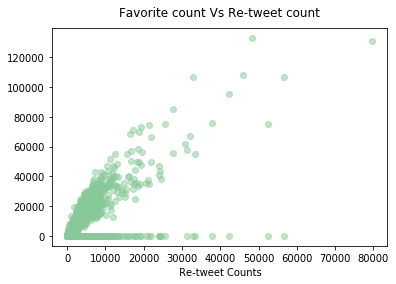

In [2071]:
y=df.favorite_count
x=df.retweet_count
plt.scatter( x, y, color = '#88c999',alpha=0.5)
plt.title("Favorite count Vs Re-tweet count",{'fontsize': 12},pad=12)
plt.xlabel(" Re-tweet Counts")
plt.show();

### Insights:
1. The top 5 most common dog names are; Charlie, Oliver, Cooper, Lucy, Lola.

2. Golden_Retriever and Labrador_Retriever are the top two highly rated breeds.

3. The Saluki breed has the most average favorite count, hence most likes on twitter albert the  Lakeland_Terrier had a maximum favorite count.

4. The Standard Poodle breed has on average more retweet counts, with the Labrador_Retriever with the maximum retweet counts.

5. There is a general positive correlation between dog retweet counts and favorite counts.